In [1]:
import random
import pandas as pd
import numpy as np
from citipy import citipy
import os as os
import json
import requests
import matplotlib.pyplot as plt
import csv as csv

from config import api_key

url = "http://api.openweathermap.org/data/2.5/weather?"

In [2]:

# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#city-name
city_name=[]
for city_name in cities:
    name = city.city_name
    city_name.append(name)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
#lists of shit
temperature_list = []
humidity_list = []
cloudiness_list = []
wind_speed_list = []
latitude_list = []
longitude_list= []
names_list = []
country_list = []

#url
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
for city in cities:
    query_url = url + "appid=" + api_key + "&q=" + city + "&units=imperial"
    response = requests.get(query_url)
    if response.status_code == 200:
        response = response.json()
        longitude_list.append(response["coord"]["lon"])
        latitude_list.append(response["coord"]["lat"])
        wind_speed_list.append(response["wind"]["speed"])
        cloudiness_list.append(response["clouds"]["all"])
        humidity_list.append(response["main"]["humidity"])
        temperature_list.append(response["main"]["temp"])
        names_list.append(response["name"])
        country_list.append(response["sys"]["country"])

        


In [22]:
# city_data =[]


# for i in range(len(longitude_list)):
#     fake_dict = {"lat": latitude_list[i],
#            "lon": longitude_list[i],
#            "temp": temperature_list[i],
#            "humidity": humidity_list[i],
#            "clouds": cloudiness_list[i],
#            "wind": wind_speed_list[i],
#            "names": names_list[i],
#            "country": country_list[i]}
#     city_data.append(fake_dict)
#     dict = {}

# latitude_list_2 = []
# for number in latitude_list:
#     latitude_list_2.append(float(str(number).strip()))
# latitude_list_2


# temperature_list_2 = []
# for number in temperature_list:
#     temperature_list_2.append(float(str(number).strip()))
# temperature_list_2

In [39]:
# city_df = pd.DataFrame({
#     "City Name": names_list,
#     "Country Name": country_list,
#     "Lat": latitude_list,
#     "Long": longitude_list,
#     "Temp": temperature_list,
#     "Humidity": humidity_list,
#     "Clouds": cloudiness_list,
#     "Wind": wind_speed_list
# })
# city_df

In [40]:
weather_dictionary = {
    "City Name": names_list,
    "Country": country_list,
    "Lat": latitude_list,
    "Long": longitude_list,
    "Temp": temperature_list,
    "Humidty": humidity_list,
    "Clouds": cloudiness_list,
    "Wind": wind_speed_list
}

In [42]:
weather_dataframe = pd.DataFrame(weather_dictionary)
weather_dataframe.head()

,City Name,Country,Lat,Long,Temp,Humidty,Clouds,Wind
0,Ushuaia,AR,-54.81,-68.31,53.60,70,75,1.92
1,Killarney,AU,-28.34,152.30,86.00,18,0,4.00
2,Saskylakh,RU,71.97,114.09,-16.44,96,100,13.04
3,Vaini,IN,15.34,74.49,62.60,88,96,6.08
4,Rikitea,PF,-23.12,-134.97,75.70,72,78,4.90


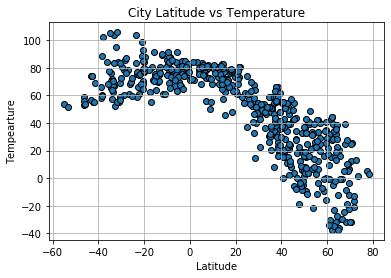

In [51]:
#latitude vs temp

plt.scatter(weather_dataframe["Lat"],weather_dataframe["Temp"], edgecolors = 'Black')
plt.title("City Latitude vs Temperature")
plt.xlabel("Latitude")
plt.ylabel("Tempearture")
plt.grid()
plt.savefig("Lat_vs_Temp.png")

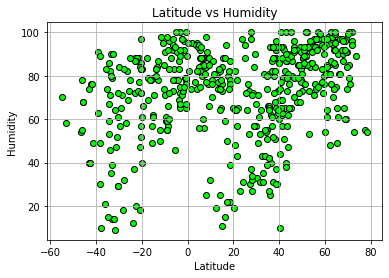

In [58]:
#latitude vs humidity
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Humidty"], edgecolors = 'black', facecolors = 'lime')
plt.title("Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.grid()
plt.savefig("Lat_vs_humidity.png")

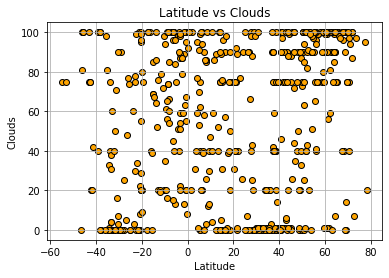

In [59]:
#latitude vs cloudiness
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Clouds"], edgecolors = 'black', facecolors = 'orange')
plt.title("Latitude vs Clouds")
plt.xlabel("Latitude")
plt.ylabel("Clouds")
plt.grid()
plt.savefig("Lat_vs_Cloud.png")

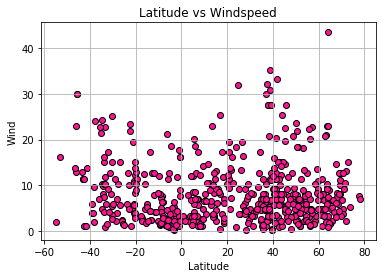

In [60]:
#latitude vs windspeed
plt.scatter(weather_dataframe["Lat"], weather_dataframe["Wind"], edgecolors = 'black', facecolors = 'deeppink')
plt.title("Latitude vs Windspeed")
plt.xlabel("Latitude")
plt.ylabel("Wind")
plt.grid()
plt.savefig("Lat_vs_Wind.png")